# Simulacion - Atractor de Lorenz   

Este proyecto implementa y compara los métodos de Euler y Runge-Kutta de cuarto orden para resolver el sistema de Lorenz. Se incluyen gráficas de las variables en el tiempo, vistas 3D de los atractores, comparación visual entre métodos, cálculo del error relativo promedio y una animación 3D exportada como archivo de video `.mp4`.


# Requisitos para ejecutar el proyecto

Este proyecto requiere las siguientes librerías de Python:

```bash
pip install numpy matplotlib notebook
```

También se necesita tener instalado **ffmpeg** para poder exportar la animación en formato MP4.

## Instalación de ffmpeg

- En Ubuntu/Debian:

```bash
sudo apt install ffmpeg
```

- En Windows:

1. Descarga desde: https://ffmpeg.org/download.html
2. Extrae el archivo ZIP  
3. Agrega la carpeta `bin/` a la variable de entorno `PATH`

Una vez instaladas las librerías y ffmpeg, puedes ejecutar el archivo.

Se generará automáticamente una carpeta `resultados/` con todas las gráficas.
Se generará el archivo `atractor_lorenz.mp4`.


🖼️ Gráfica guardada: resultados/caso_1_euler_xyz.png


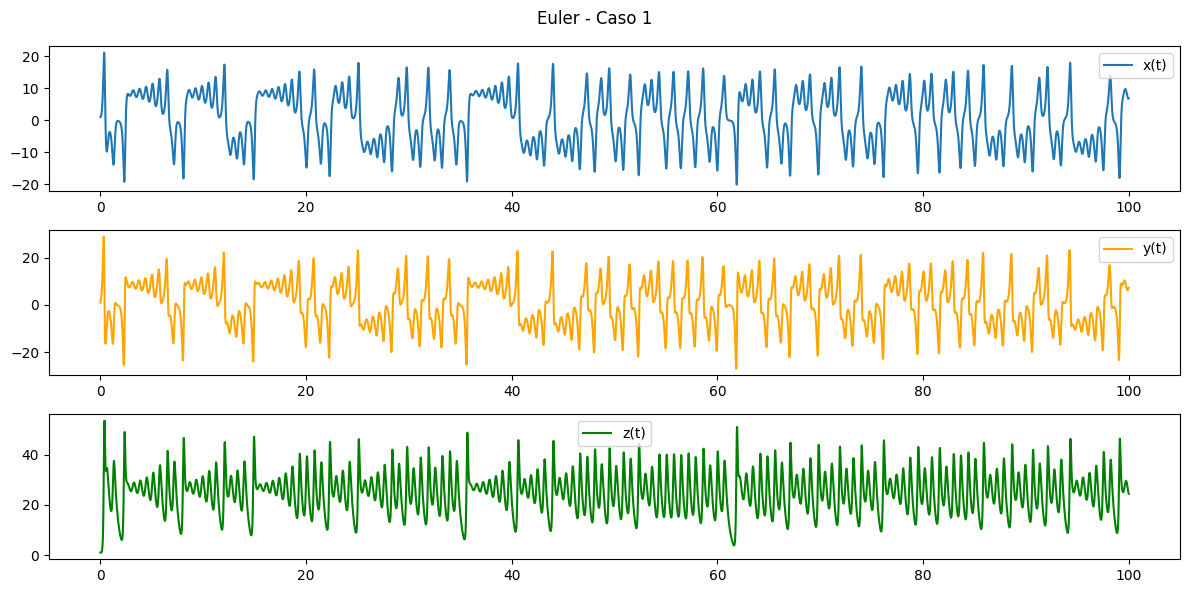

🖼️ Gráfica 3D guardada: resultados/caso_1_euler_3d.png


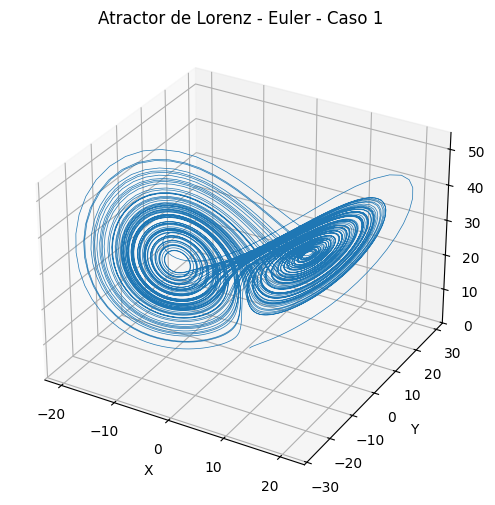

🖼️ Gráfica guardada: resultados/caso_1_runge-kutta_xyz.png


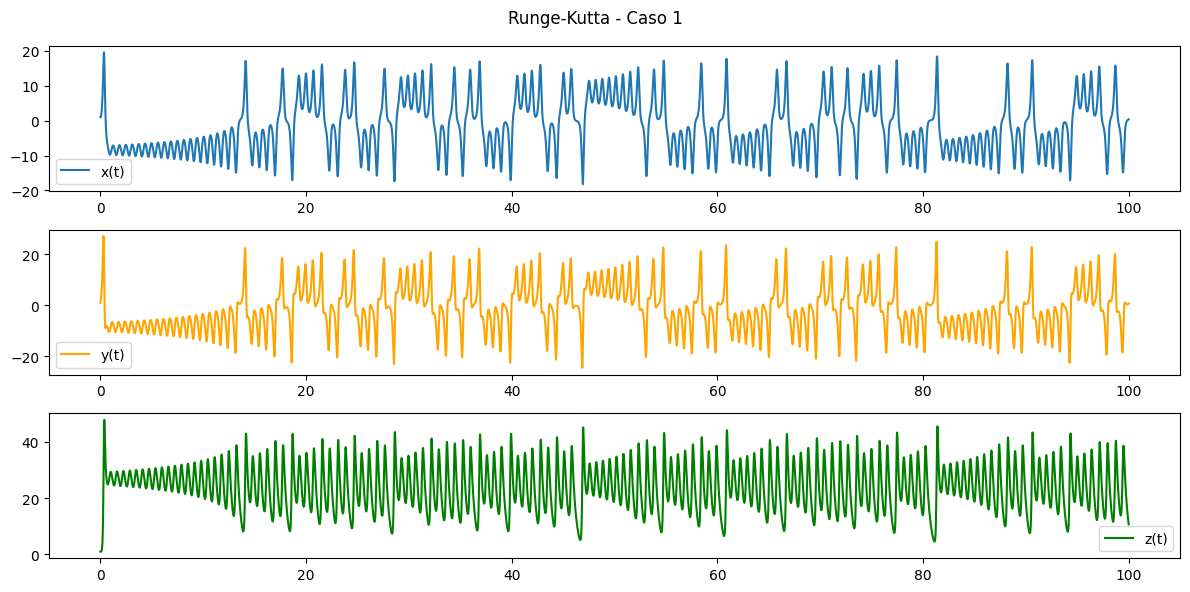

🖼️ Gráfica 3D guardada: resultados/caso_1_runge-kutta_3d.png


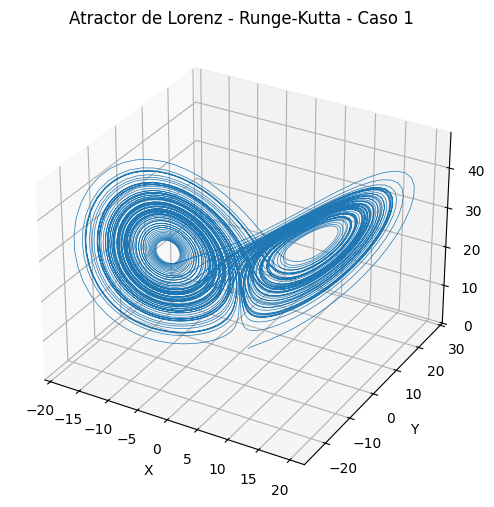

 Caso 1 - Error relativo medio:
  x(t): 23.00620
  y(t): 19.13836
  z(t): 0.48790

🖼️ Gráfica guardada: resultados/caso_2_euler_xyz.png


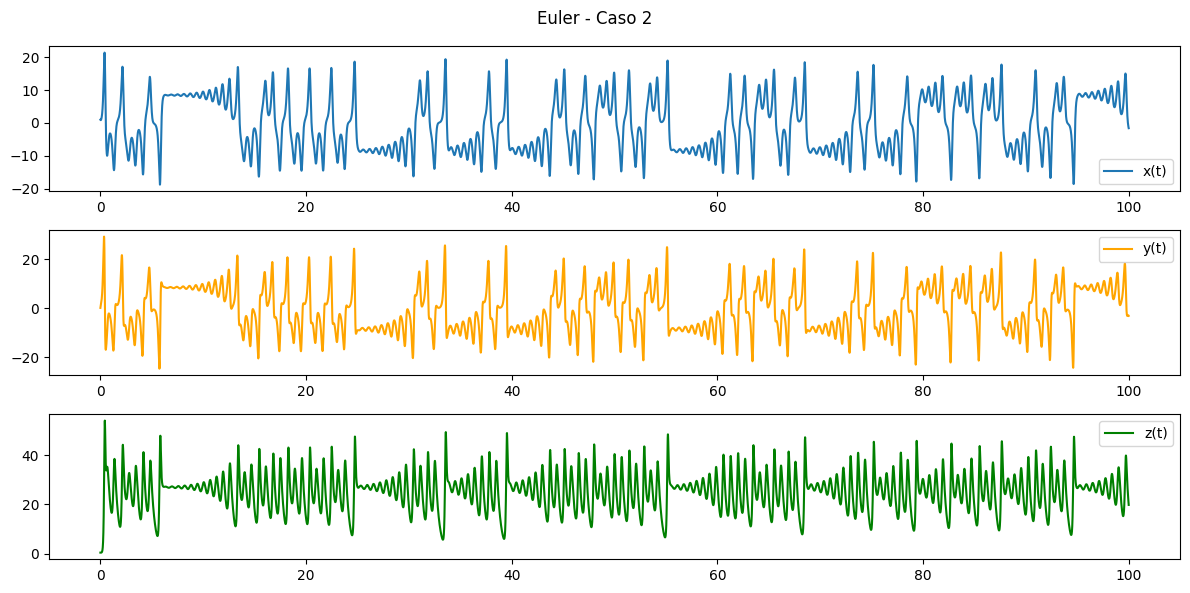

🖼️ Gráfica 3D guardada: resultados/caso_2_euler_3d.png


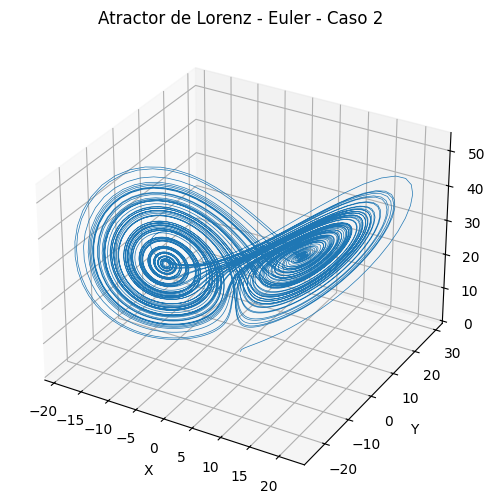

🖼️ Gráfica guardada: resultados/caso_2_runge-kutta_xyz.png


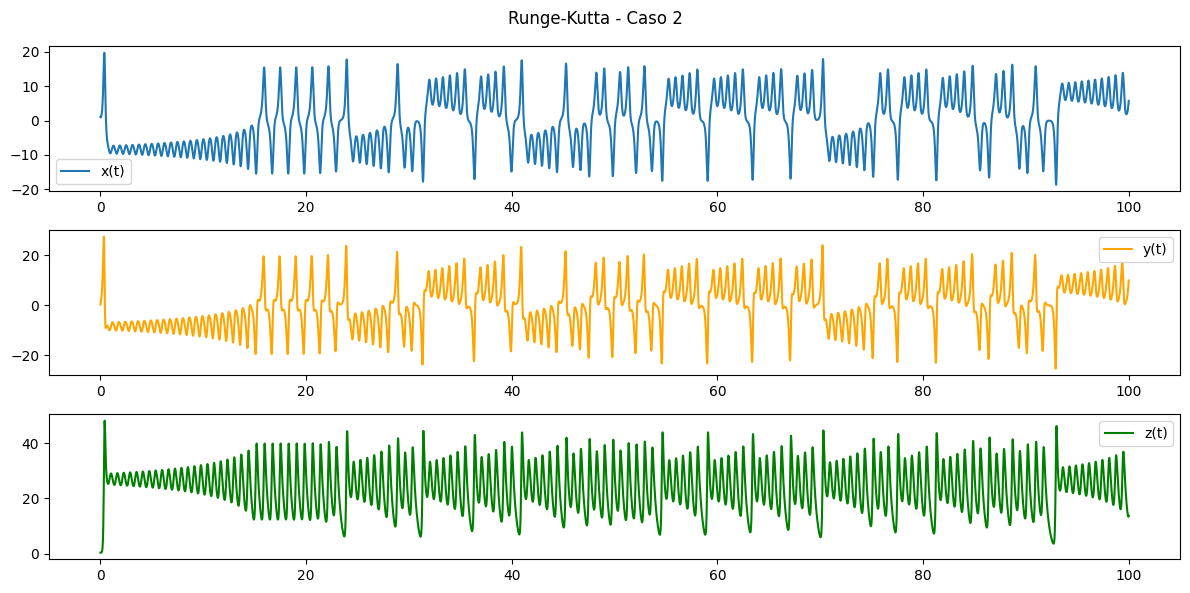

🖼️ Gráfica 3D guardada: resultados/caso_2_runge-kutta_3d.png


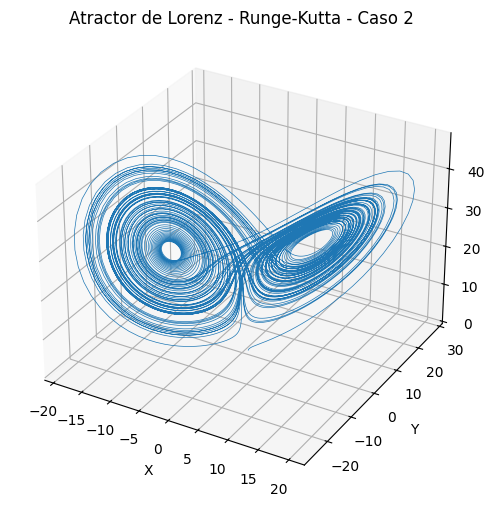

 Caso 2 - Error relativo medio:
  x(t): 98.42104
  y(t): 12.73268
  z(t): 0.43640

🖼️ Gráfica guardada: resultados/caso_3_euler_xyz.png


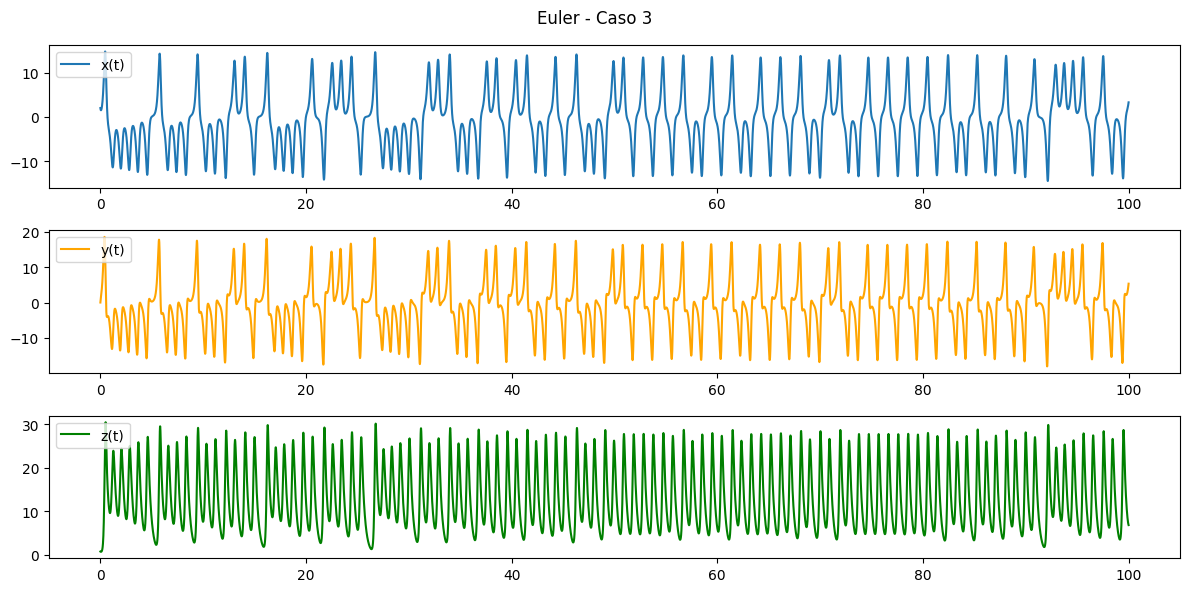

🖼️ Gráfica 3D guardada: resultados/caso_3_euler_3d.png


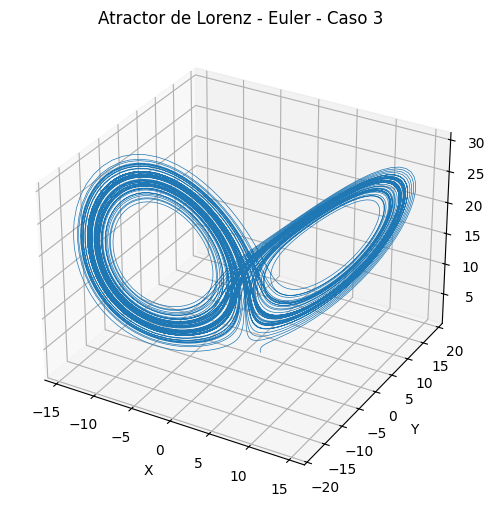

🖼️ Gráfica guardada: resultados/caso_3_runge-kutta_xyz.png


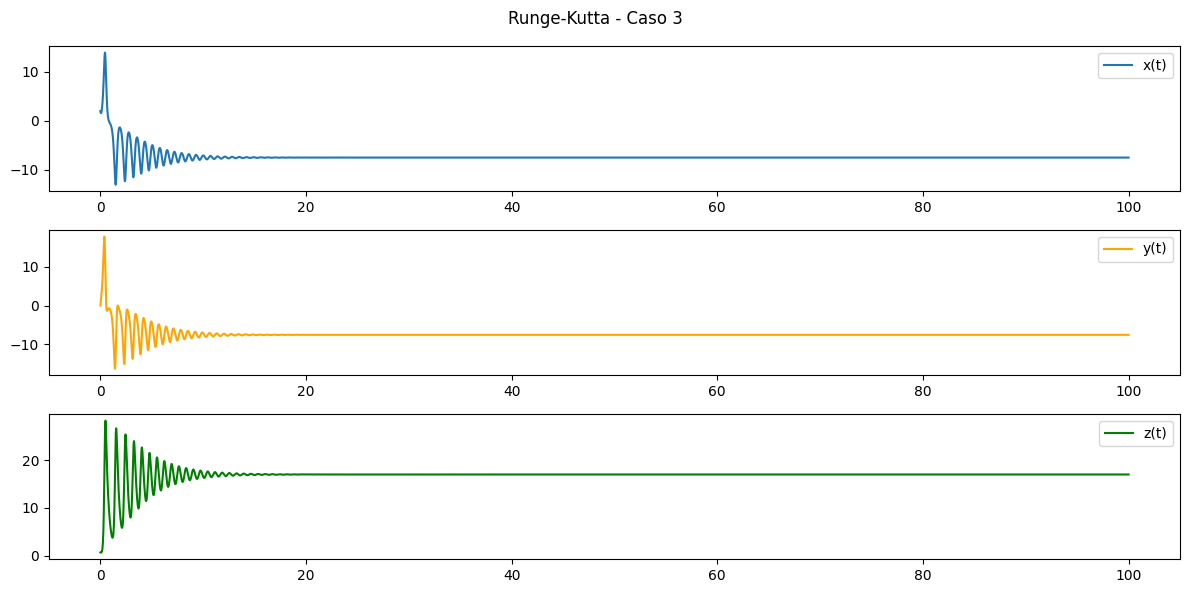

🖼️ Gráfica 3D guardada: resultados/caso_3_runge-kutta_3d.png


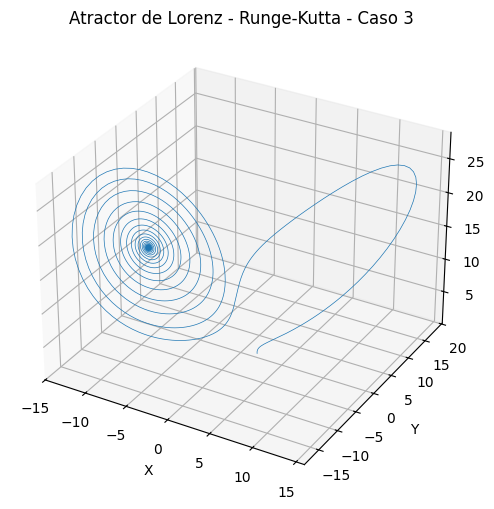

 Caso 3 - Error relativo medio:
  x(t): 1.17823
  y(t): 1.49744
  z(t): 0.46462

Animación exportada como 'resultados/atractor_lorenz.mp4'


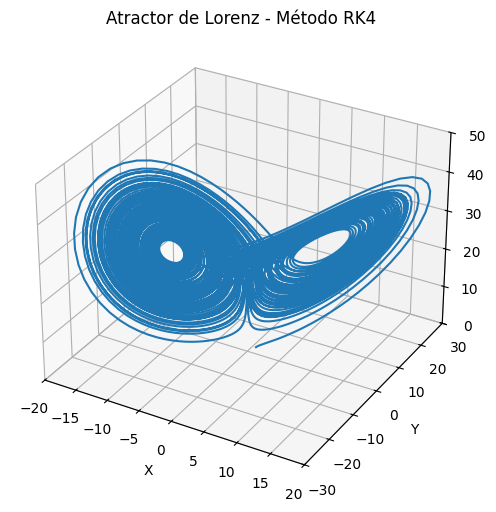

In [2]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os

# Crear carpeta de resultados si no existe
os.makedirs("resultados", exist_ok=True)

# Sistema de Lorenz
def lorenz(x, y, z, sigma, rho, beta):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

# Método de Euler
def euler_lorenz(x0, y0, z0, sigma, rho, beta, h, n_steps):
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0
    for _ in range(n_steps):
        dx, dy, dz = lorenz(x, y, z, sigma, rho, beta)
        x += h * dx
        y += h * dy
        z += h * dz
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return xs, ys, zs

# Método de Runge-Kutta 4
def rk4_lorenz(x0, y0, z0, sigma, rho, beta, h, n_steps):
    xs, ys, zs = [x0], [y0], [z0]
    x, y, z = x0, y0, z0
    for _ in range(n_steps):
        dx1, dy1, dz1 = lorenz(x, y, z, sigma, rho, beta)
        dx2, dy2, dz2 = lorenz(x + h/2 * dx1, y + h/2 * dy1, z + h/2 * dz1, sigma, rho, beta)
        dx3, dy3, dz3 = lorenz(x + h/2 * dx2, y + h/2 * dy2, z + h/2 * dz2, sigma, rho, beta)
        dx4, dy4, dz4 = lorenz(x + h * dx3, y + h * dy3, z + h * dz3, sigma, rho, beta)
        x += h/6 * (dx1 + 2*dx2 + 2*dx3 + dx4)
        y += h/6 * (dy1 + 2*dy2 + 2*dy3 + dy4)
        z += h/6 * (dz1 + 2*dz2 + 2*dz3 + dz4)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return xs, ys, zs

# Gráficas x(t), y(t), z(t)
def plot_xyz(t, xs, ys, zs, metodo, titulo):
    plt.figure(figsize=(12,6))
    plt.subplot(3,1,1)
    plt.plot(t, xs, label="x(t)")
    plt.legend()
    plt.subplot(3,1,2)
    plt.plot(t, ys, label="y(t)", color="orange")
    plt.legend()
    plt.subplot(3,1,3)
    plt.plot(t, zs, label="z(t)", color="green")
    plt.legend()
    plt.suptitle(f"{metodo} - {titulo}")
    plt.tight_layout()

    nombre_archivo = f"resultados/{titulo.lower().replace(' ', '_')}_{metodo.lower()}_xyz.png"
    plt.savefig(nombre_archivo, dpi=300)
    print(f"🖼️ Gráfica guardada: {nombre_archivo}")

    plt.show()

# Gráfica 3D
def plot_3d(xs, ys, zs, metodo, titulo):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(xs, ys, zs, lw=0.5)
    ax.set_title(f"Atractor de Lorenz - {metodo} - {titulo}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    nombre_archivo = f"resultados/{titulo.lower().replace(' ', '_')}_{metodo.lower()}_3d.png"
    plt.savefig(nombre_archivo, dpi=300)
    print(f"🖼️ Gráfica 3D guardada: {nombre_archivo}")

    plt.show()

# Error relativo promedio
def calcular_error_relativo(xs_ref, xs_aprox):
    xs_ref = np.array(xs_ref)
    xs_aprox = np.array(xs_aprox)
    error = np.abs(xs_ref - xs_aprox) / (np.abs(xs_ref) + 1e-10)
    return np.mean(error)

# Simulación de casos
h = 0.01
n_steps = 10000
t = np.linspace(0, h * n_steps, n_steps + 1)
casos = [
    ("Caso 1", 1.0, 1.0, 1.0, 10, 28, 8/3),
    ("Caso 2", 1.002025, 0.2, 0.4, 10, 28, 8/3),
    ("Caso 3", 2.0, 0.009, 0.7, 9, 18, 10/3)
]

for titulo, x0, y0, z0, sigma, rho, beta in casos:
    # Euler
    xs_e, ys_e, zs_e = euler_lorenz(x0, y0, z0, sigma, rho, beta, h, n_steps)
    plot_xyz(t, xs_e, ys_e, zs_e, "Euler", titulo)
    plot_3d(xs_e, ys_e, zs_e, "Euler", titulo)

    # RK4
    xs_rk, ys_rk, zs_rk = rk4_lorenz(x0, y0, z0, sigma, rho, beta, h, n_steps)
    plot_xyz(t, xs_rk, ys_rk, zs_rk, "Runge-Kutta", titulo)
    plot_3d(xs_rk, ys_rk, zs_rk, "Runge-Kutta", titulo)

    # Errores
    error_x = calcular_error_relativo(xs_rk, xs_e)
    error_y = calcular_error_relativo(ys_rk, ys_e)
    error_z = calcular_error_relativo(zs_rk, zs_e)
    print(f" {titulo} - Error relativo medio:")
    print(f"  x(t): {error_x:.5f}")
    print(f"  y(t): {error_y:.5f}")
    print(f"  z(t): {error_z:.5f}\n")

# Animación final con RK4
x0, y0, z0 = 1.0, 1.0, 1.0
sigma, rho, beta = 10, 28, 8/3
xs, ys, zs = rk4_lorenz(x0, y0, z0, sigma, rho, beta, h, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
line, = ax.plot([], [], [], lw=1.5)

def init():
    ax.set_xlim([-20, 20])
    ax.set_ylim([-30, 30])
    ax.set_zlim([0, 50])
    ax.set_title("Atractor de Lorenz - Método RK4")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    return line,

def update(num):
    line.set_data(xs[:num], ys[:num])
    line.set_3d_properties(zs[:num])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(xs), init_func=init, blit=True, interval=1)
ani.save("atractor_lorenz.mp4", writer='ffmpeg', fps=30)
print("Animación exportada como 'resultados/atractor_lorenz.mp4'")
